In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [12]:
#display all columns
pd.set_option('display.max_columns', None)
#default parameters for graph using matplotlib
plt.rcParams['figure.figsize'] = (28, 18)

In [8]:
df = pd.read_csv('train.csv')

In [9]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

<AxesSubplot:>

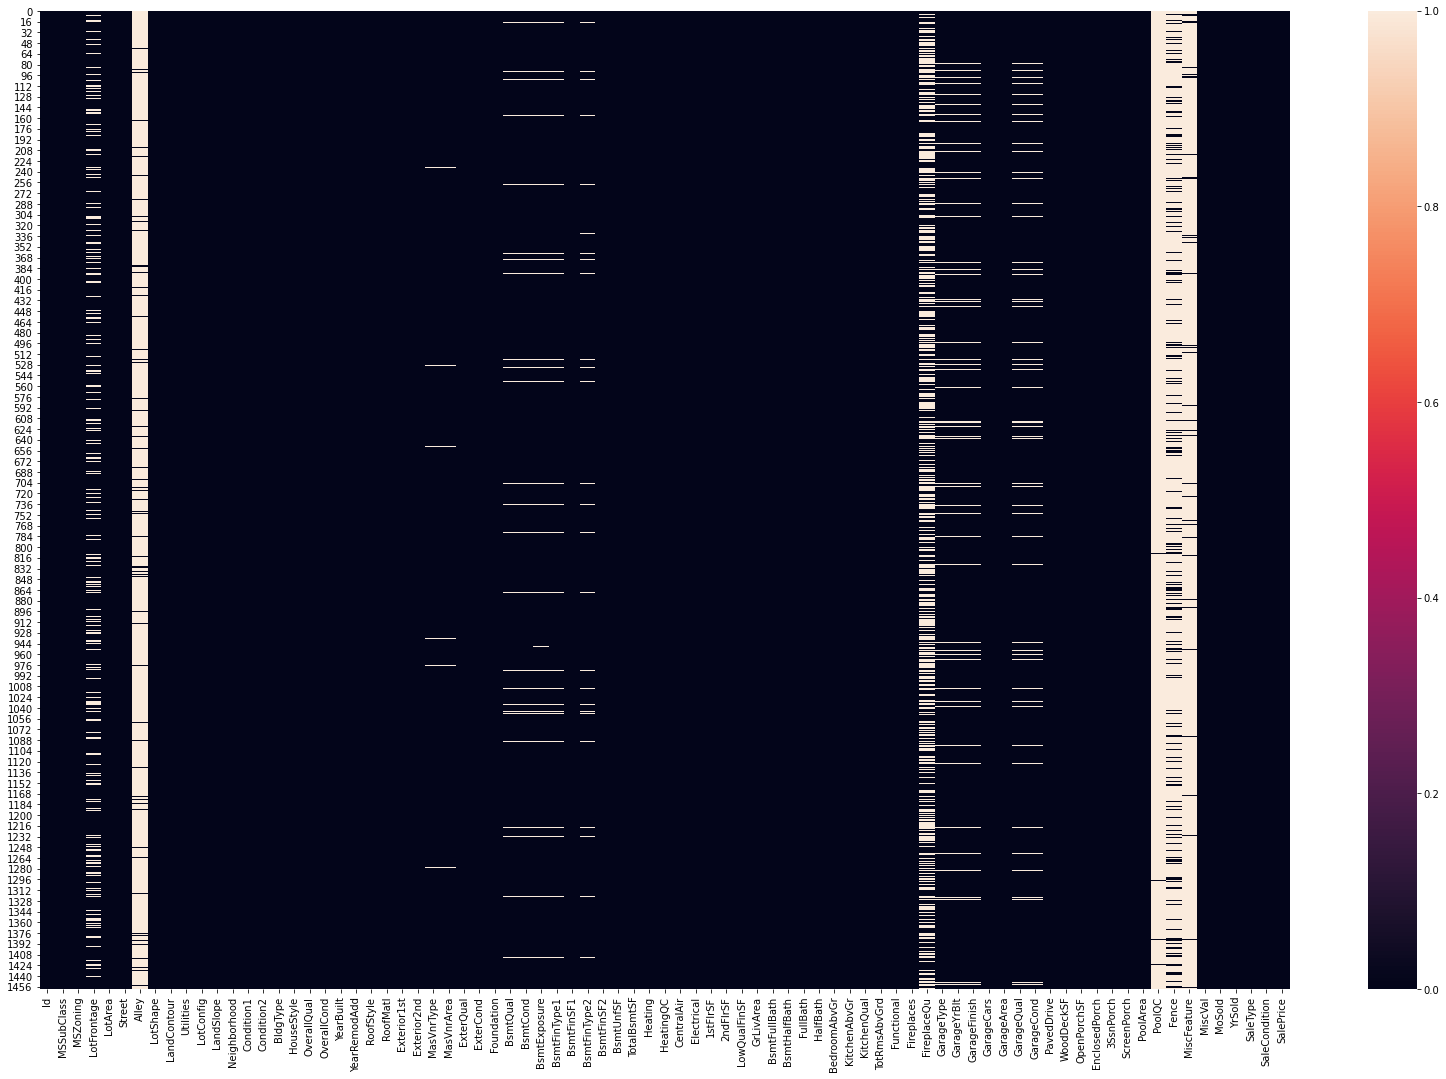

In [13]:
sns.heatmap(df.isna(), data=df)

In [16]:
df.shape

(1460, 81)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
feature_cols = []
for col in df.columns:
    if col != 'SalePrice':
        feature_cols.append(col)
target_cols = ['SalePrice']

In [48]:
print(feature_cols)
print(target_cols)
print(len(feature_cols))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [86]:
cat_cols = [col for col in feature_cols if df[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]
print(cat_cols)
print(cont_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

<AxesSubplot:>

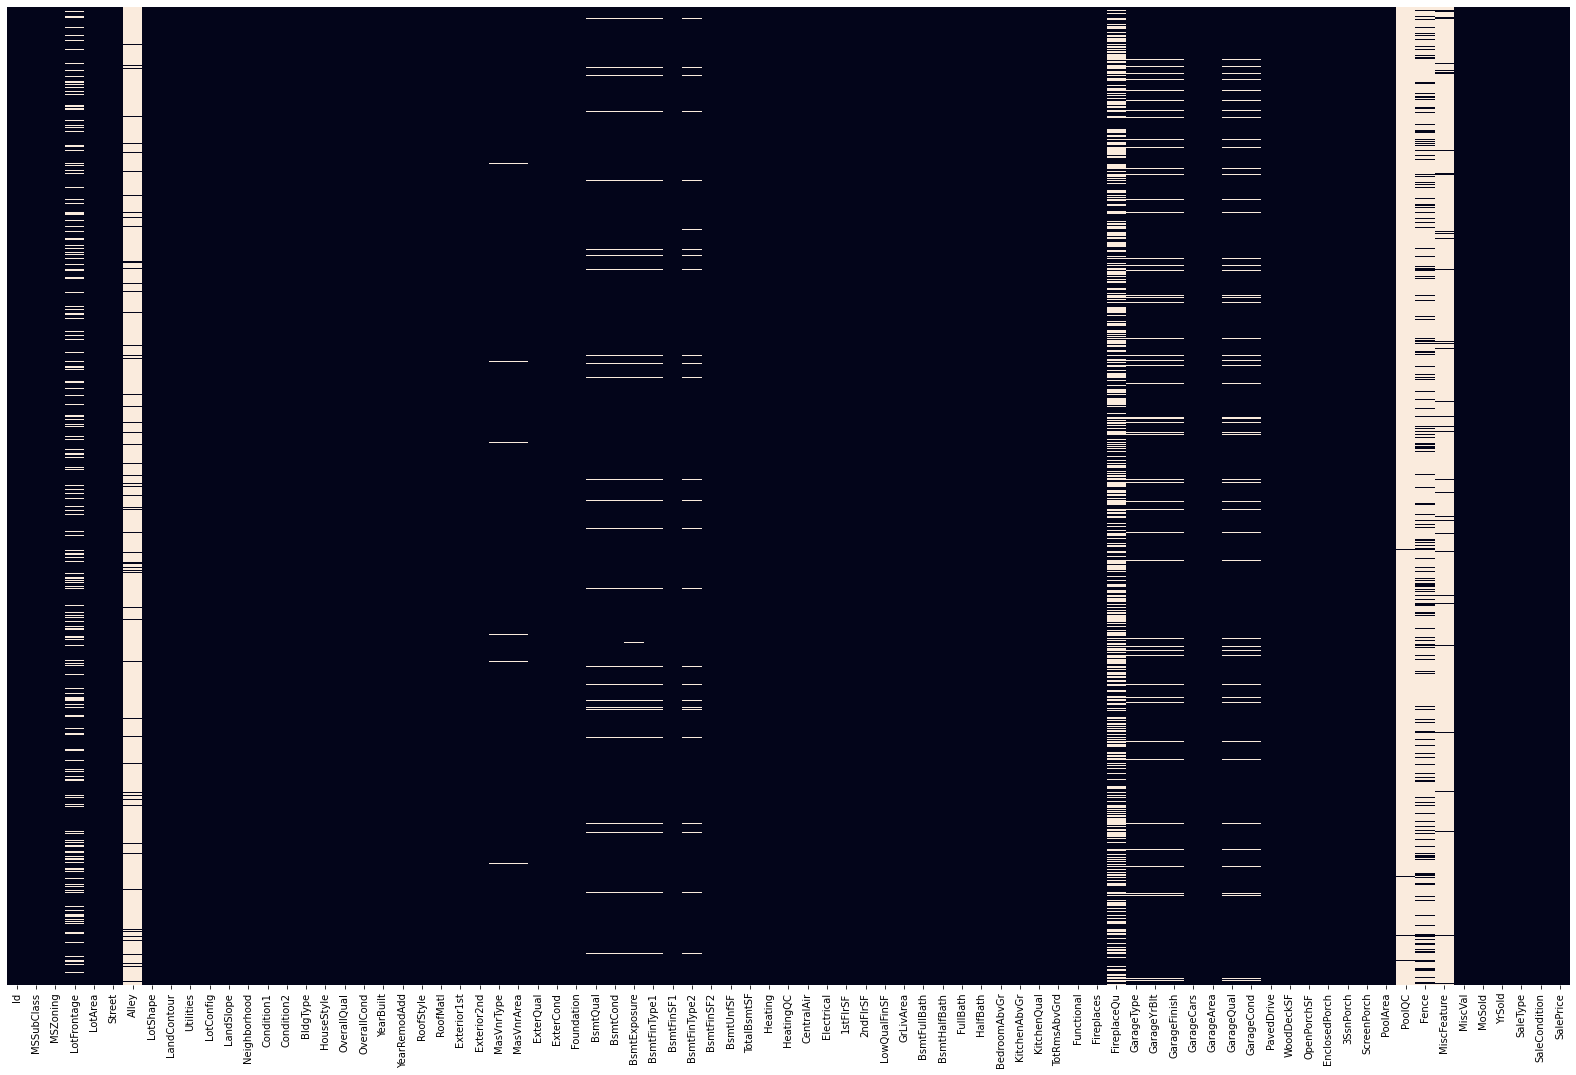

In [54]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, xticklabels=df.columns)

# List Comprehension

In [58]:
numbers = []

for i in range(1, 6):
    numbers.append(2**i)
    
print(numbers)
    

[2, 4, 8, 16, 32]


In [59]:
numbers = [2**i for i in range(1,6 )]
print(numbers)

[2, 4, 8, 16, 32]


In [61]:
import math

numbers = [49, 64, 81, 100, 121]

new_list = [math.sqrt(n) for n in numbers]

print(new_list)

[7.0, 8.0, 9.0, 10.0, 11.0]


In [62]:
new_list2 = [math.sqrt(n) for n in numbers if n%2==0]

print(new_list2)

[8.0, 10.0]


In [63]:
team1 = ["Janet", "Arya", "Mary"]
team2 = ["Evan", "Jake", "Randy"]

new_list = [(x,y) for x in team1 for y in team2]#nested loop
print(new_list)

[('Janet', 'Evan'), ('Janet', 'Jake'), ('Janet', 'Randy'), ('Arya', 'Evan'), ('Arya', 'Jake'), ('Arya', 'Randy'), ('Mary', 'Evan'), ('Mary', 'Jake'), ('Mary', 'Randy')]


# Set & Dictionary Comprehension 

In [66]:
word = 'programming'

alphabets = {x for x in word}
print(alphabets)

{'r', 'm', 'n', 'p', 'i', 'g', 'a', 'o'}


In [67]:
numbers = [1, 2, 3, 4, 5, 6]

square_dict = dict()

for num in numbers:
    square_dict[num] = num**2
    
print(square_dict)

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36}


In [71]:
square_dict = {num:num**2 for num in numbers}

print(square_dict)

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36}


In [73]:
old_price = {"milk":1.02, "coffee":2.5, "bread":2.5}

new_price = {key: value*1.5 if value > 2 else value
            for (key, value) in old_price.items()}

print(new_price)

{'milk': 1.02, 'coffee': 3.75, 'bread': 3.75}


# Lambda Functions

In [90]:
def double(n):
    return n*2

print(double(10))

20


In [92]:
double = lambda n:n*2
print(double(10))

20


In [93]:
larger = lambda a,b:a if a>b else b
print(larger(10,7))

10


# Helper Functions


In [140]:
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

In [141]:
demo_col = pd.Series(['apple', 'mango', 'banana', 'apple', 'banana', np.NaN])
print(f'Unique Values in the Column: {demo_col.unique()}')
print(f'Unique Values of type string: {[i for i in demo_col.unique() if type(i) == str]}')

Unique Values in the Column: ['apple' 'mango' 'banana' nan]
Unique Values of type string: ['apple', 'mango', 'banana']


In [142]:
le = LabelEncoder()
unique_without_nan = pd.Series([i for i in demo_col.unique() if type(i) == str])
print(unique_without_nan)

0     apple
1     mango
2    banana
dtype: object


In [143]:
le = LabelEncoder()
unique_without_nan = pd.Series([i for i in demo_col.unique() if type(i) == str])
le.fit(unique_without_nan)
print(unique_without_nan)
demo_col.apply(lambda x: le.transform([x])[0] if type(x) == str else x)


0     apple
1     mango
2    banana
dtype: object


0    0.0
1    2.0
2    1.0
3    0.0
4    1.0
5    NaN
dtype: float64

# Dropping Missing Values

In [144]:
# rows
sum(df.isna().sum(axis=1) > 0)

1460

In [145]:
#columns
sum(df.isna().sum(axis=0) > 0)

19

# Simple Imputer (Univariate Imputation)

In [146]:
df_simple_imputer = df.copy()

In [147]:
imputer = SimpleImputer(strategy='mean')

df_simple_imputer[cont_cols] = imputer.fit_transform(df_simple_imputer[cont_cols])

In [148]:
imputer = SimpleImputer(strategy='most_frequent')

df_simple_imputer[cat_cols] = imputer.fit_transform(df_simple_imputer[cat_cols])

<AxesSubplot:>

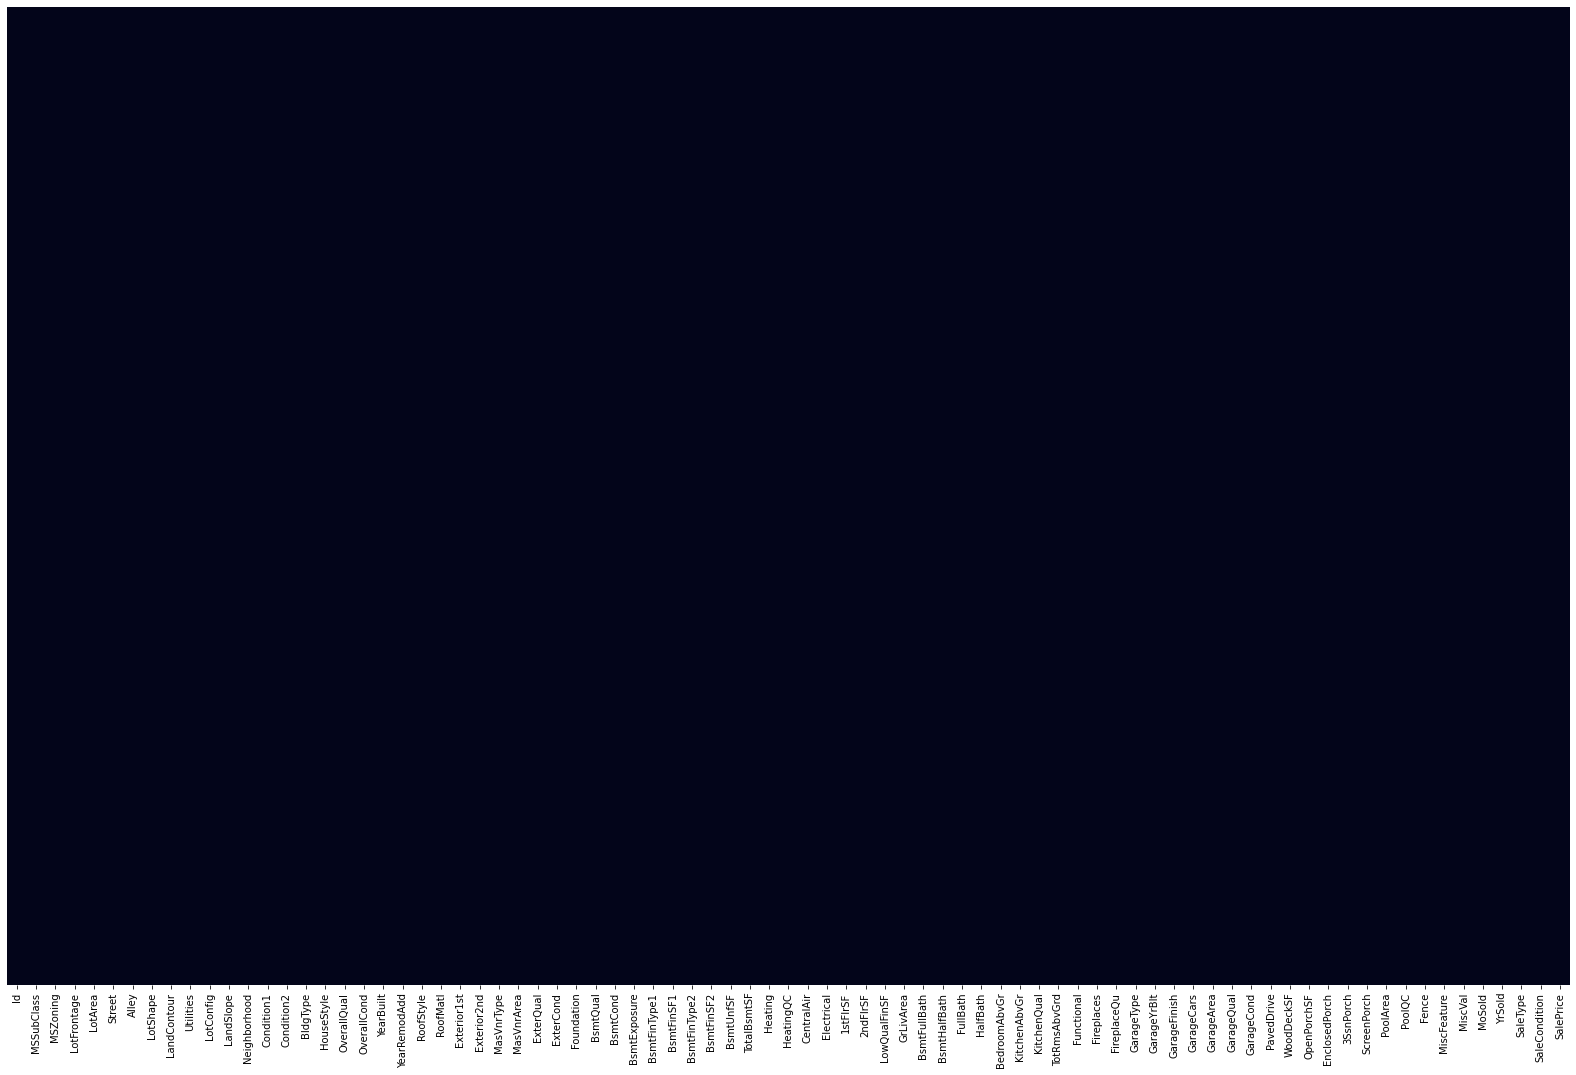

In [149]:
sns.heatmap(df_simple_imputer.isnull(), cbar=False, yticklabels=False, xticklabels=df.columns)

# Multivariate Imputation - KNN

A strategy for imputing missing values by modeling each feature with missing values as a function of other features

KNNImputer doesn't work on strings so we need to encode the strings into float or int keeping the NaN values
So we use encode_missing_columns created before to encode string values

In [150]:
df_knn_imputer = df.copy()

# for col in cat_cols:
    encode_missing_columns(df_knn_imputer, col)

In [152]:
knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputer[feature_cols] = knn_imputer.fit_transform(df_knn_imputer[feature_cols])

<AxesSubplot:>

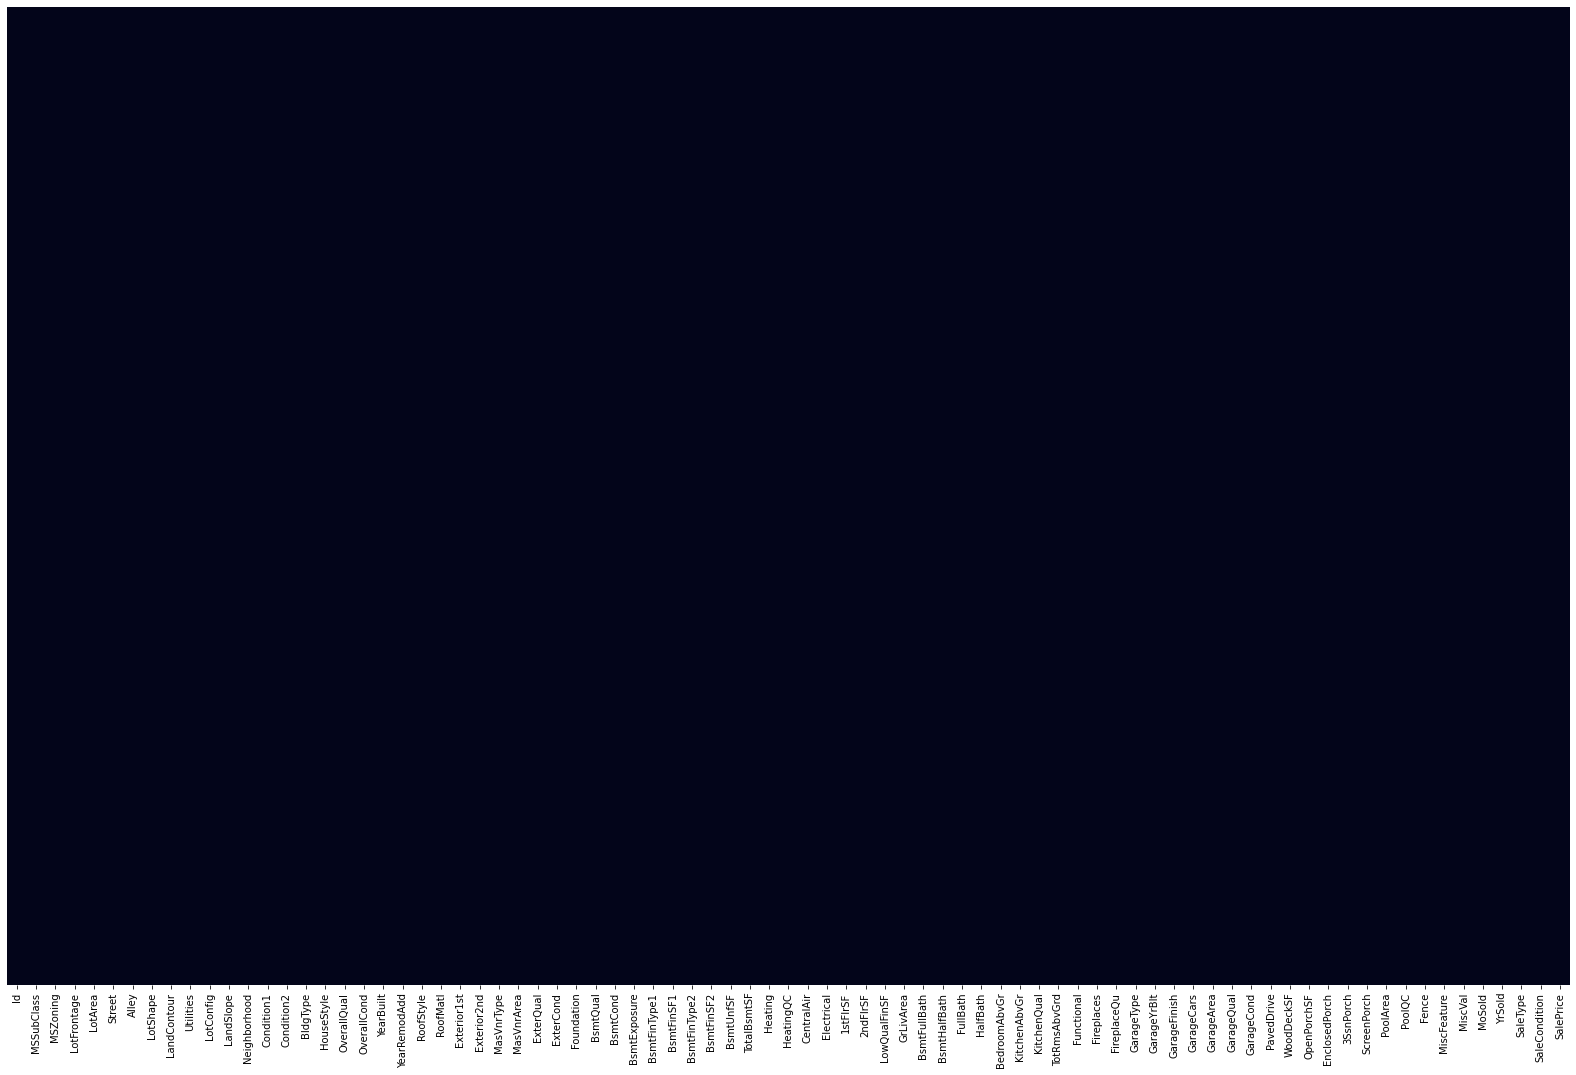

In [153]:
sns.heatmap(df_knn_imputer.isnull(), cbar=False, yticklabels=False, xticklabels=df.columns)

# Iterative Imputer

Like KNNImputer, Iterative Imputer also doesn't work on strings

In [155]:
df_iterative_imputer = df.copy()

In [156]:
for col in cat_cols:
    encode_missing_columns(df_iterative_imputer, col)

In [157]:
itr_imputer = IterativeImputer()

df_iterative_imputer[feature_cols] = itr_imputer.fit_transform(df_iterative_imputer[feature_cols])

# Missing Indicator

Most of the times the missing values are not randomly distributed across observations but are distributed within one or more sub-samples. Therefore, missingness itself might be a good indicator to classify the labels

In [159]:
from sklearn.impute import MissingIndicator

In [160]:
df_miss = df.copy()

In [161]:
miss_indicator = MissingIndicator()

In [162]:
X_miss = miss_indicator.fit_transform(df_miss[feature_cols])

In [163]:
X_miss.shape

(1460, 19)

# Missing Indicator + Iterative Imputer

In [169]:
df_miss_itr = df.copy()

In [170]:
for col in cat_cols:
    encode_missing_columns(df_miss_itr, col)

In [180]:
# setting add_indicator=True
#returns missing indicators alongwith the imputed dataframe
#include 19 missing indicator features
itr_imputer = IterativeImputer(add_indicator=True) 
X = itr_imputer.fit_transform(df_miss_itr[feature_cols])

In [181]:
#We have 99 feature columns now 
#(80 original features + 19 missing indicator features) and 1 target column
X.shape

(1460, 99)

In [182]:
X

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 2.000e+01, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [3.000e+00, 6.000e+01, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.459e+03, 2.000e+01, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.460e+03, 2.000e+01, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])